In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

In [6]:
avocado_df = pd.read_csv('avocado_mean.csv', parse_dates=['Date'])

In [7]:
avocado_df.head()

Date  AveragePrice
0 2015-01-04      1.301296
1 2015-01-11      1.370648
2 2015-01-18      1.391111
3 2015-01-25      1.397130
4 2015-02-01      1.247037

In [21]:
avocado_df.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [9]:
avocado_df.AveragePrice.rolling(3).mean().max()

1.8493209876543208

### Строим 4 графика одновременно

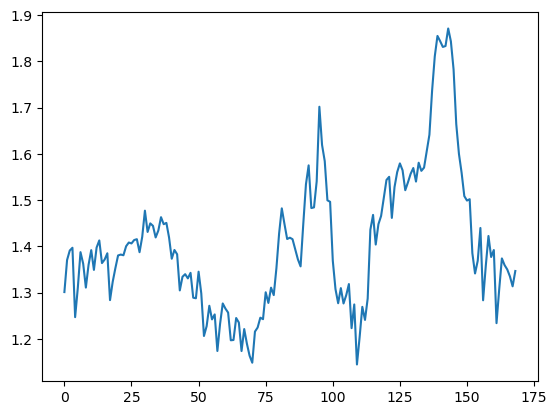

In [22]:
ax = avocado_df.AveragePrice.plot()

In [30]:
windows = [2, 4, 10, 50] #значения окна для rolling mean
colors = ['coral', 'blue', 'green', 'purple'] #цвета для графиков

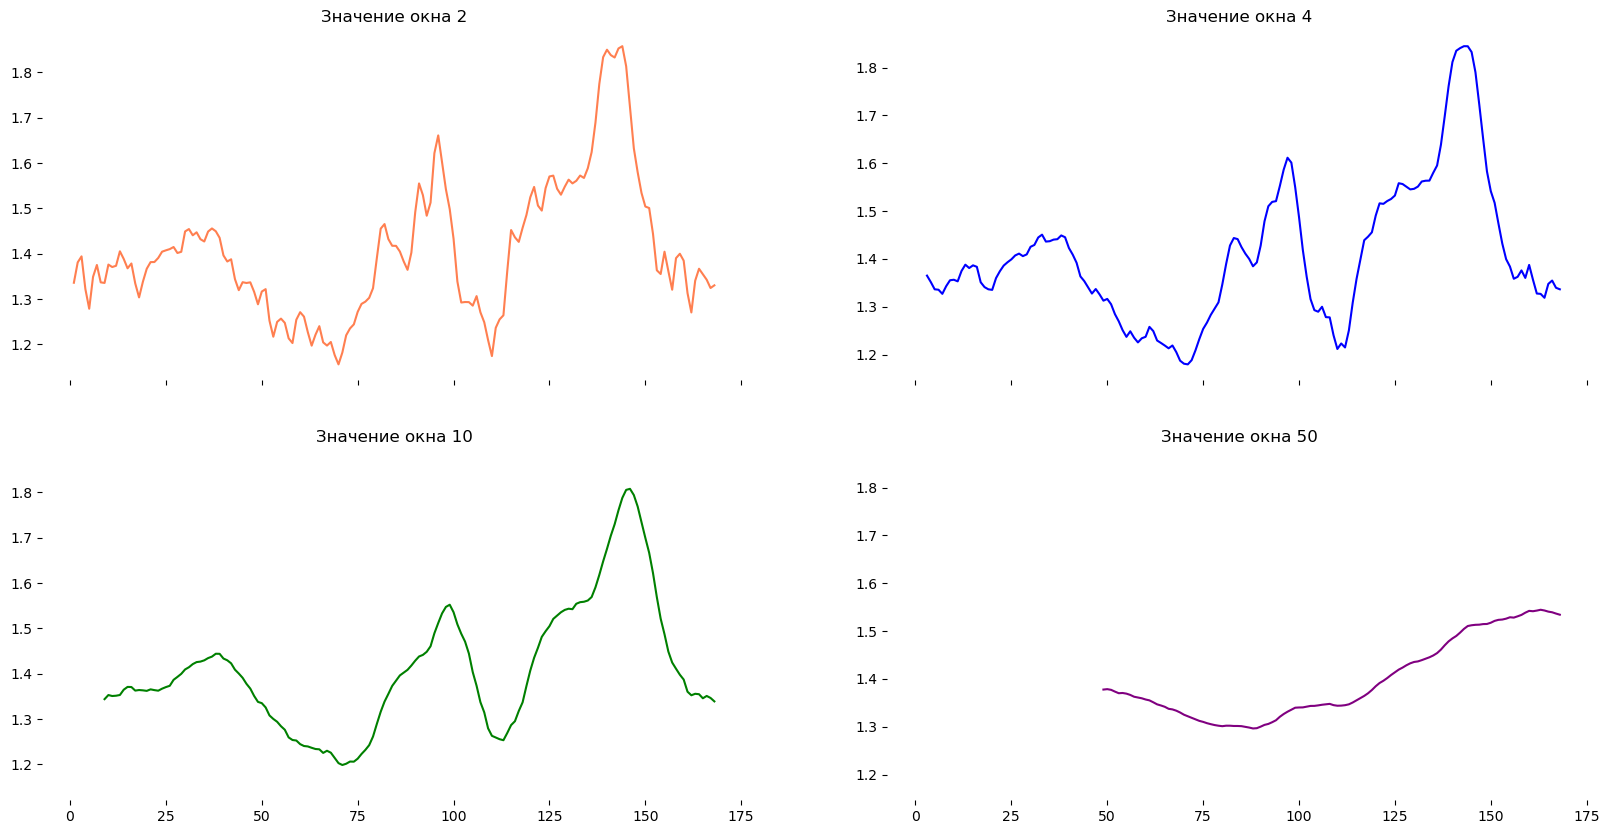

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
for window, ax, color in zip(windows, axes.flatten(), colors):
    ax.plot(avocado_df.AveragePrice.rolling(window = window).mean(), color = color, label = window)
    ax.set_title('Значение окна {}'.format(window))
for ax in axes.flatten():
    #удаляем рамку
    ax.set_frame_on(False)
    
    

In [34]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0)

In [35]:
avocado_full.head()

AveragePrice  Total Volume     4046      4225     4770  \
Date                                                                 
2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
2015-01-04          1.68       2896.72   161.68    206.96     0.00   
2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36          0.0       organic   
2015-01-04      905.55      905.55        0.00          0.0       organic   
2015-01-04     2528.08     2528.08        0.00          0.0       organic   
2015-01-04    14925.18    11264.80     3660.38          0.0  conventional   
2015-01-04      374.35      186.67      187.68          0.0       organic   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise

In [57]:
plt.figure(figsize=(20, 10), dpi=80)

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

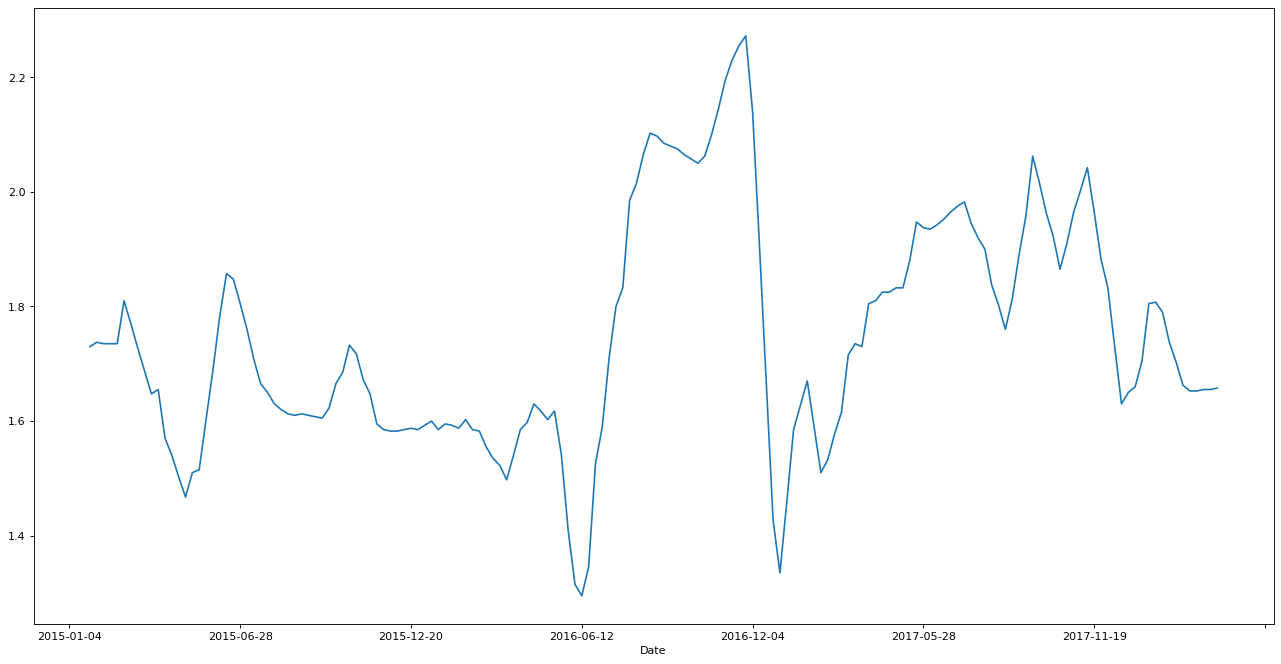

In [69]:
plt.figure(figsize=(20, 10), dpi=80)
ax = avocado_full.query('type == "organic" and region == "Chicago"').AveragePrice.rolling(4).mean().plot()


In [70]:
plt.figure(figsize=(20, 10), dpi=800)
ax = avocado_full.query('type == "organic" and region == "Chicago"').AveragePrice.ewm(span = 4).mean().plot()

In [71]:
chikago_avocado_full = avocado_full.query('type == "organic" and region == "Chicago"')

In [72]:
chikago_avocado_full.head()

AveragePrice  Total Volume     4046      4225  4770  Total Bags  \
Date                                                                          
2015-01-04          1.49      17723.17  1189.35  15628.27   0.0      905.55   
2015-01-11          1.79      12915.74  1426.75  10900.10   0.0      588.89   
2015-01-18          1.81      12499.87  1154.81  10830.61   0.0      514.45   
2015-01-25          1.83      10951.51   711.63   9515.44   0.0      724.44   
2015-02-01          1.52      14391.05  1363.35  11835.47   0.0     1192.23   

            Small Bags  Large Bags  XLarge Bags     type  year   region  
Date                                                                     
2015-01-04      905.55         0.0          0.0  organic  2015  Chicago  
2015-01-11      588.89         0.0          0.0  organic  2015  Chicago  
2015-01-18      514.45         0.0          0.0  organic  2015  Chicago  
2015-01-25      724.44         0.0          0.0  organic  2015  Chicago  
2015-02-01     1192.23         0.0          0.0  organic  2015  Chicago

In [73]:
chikago_avocado_full['roll_mean'] = chikago_avocado_full.AveragePrice.rolling(4).mean()
chikago_avocado_full['ewm'] = chikago_avocado_full.AveragePrice.ewm(span = 4).mean()

C:\Users\бвс\AppData\Local\Temp\ipykernel_4140\3381937935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chikago_avocado_full['roll_mean'] = chikago_avocado_full.AveragePrice.rolling(4).mean()
C:\Users\бвс\AppData\Local\Temp\ipykernel_4140\3381937935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chikago_avocado_full['ewm'] = chikago_avocado_full.AveragePrice.ewm(span = 4).mean()


In [76]:
chikago_avocado_full = chikago_avocado_full.reset_index()

In [77]:
chikago_avocado_full.head()

Date  AveragePrice  Total Volume     4046      4225  4770  \
0  2015-01-04          1.49      17723.17  1189.35  15628.27   0.0   
1  2015-01-11          1.79      12915.74  1426.75  10900.10   0.0   
2  2015-01-18          1.81      12499.87  1154.81  10830.61   0.0   
3  2015-01-25          1.83      10951.51   711.63   9515.44   0.0   
4  2015-02-01          1.52      14391.05  1363.35  11835.47   0.0   

   Total Bags  Small Bags  Large Bags  XLarge Bags     type  year   region  \
0      905.55      905.55         0.0          0.0  organic  2015  Chicago   
1      588.89      588.89         0.0          0.0  organic  2015  Chicago   
2      514.45      514.45         0.0          0.0  organic  2015  Chicago   
3      724.44      724.44         0.0          0.0  organic  2015  Chicago   
4     1192.23     1192.23         0.0          0.0  organic  2015  Chicago   

   roll_mean       ewm  
0        NaN  1.490000  
1        NaN  1.677500  
2        NaN  1.745102  
3     1.7300  1.784118  
4     1.7375  1.669563

In [78]:
fig = px.line(chikago_avocado_full, x="Date", y="roll_mean")
fig.show()

In [79]:
fig = px.line(chikago_avocado_full, x="Date", y="ewm")
fig.show()

In [85]:
delays = pd.read_csv('delays.csv')

In [106]:
delays.head()

client_id  company_id           delay  revenue delay_categorical
0       2389        4240 1 days 14:57:48   705436          1-2 days
1       7614        9544 4 days 02:14:23   859266  more than 3 days
2       2052        2427 0 days 06:08:57   812416   less than 1 day
3       9635        8054 0 days 23:40:19   162312   less than 1 day
4       8154        5503 1 days 13:21:53   658844          1-2 days

In [95]:
delays.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

In [90]:
delays['delay'] = delays.delay.str.replace('-','')

In [94]:
delays['delay'] = pd.to_timedelta(delays.delay)

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '50 days'], dtype='timedelta64[ns]', freq=None)

In [103]:
L = ['00:00:00', ' 1 days 00:00:00', '2 days 00:00:00', '3 days 00:00:00', '50 days 00:00:00']
bins = pd.to_timedelta(L).total_seconds()

In [102]:
labels = ['less than 1 day','1-2 days','2-3 days','more than 3 days']

In [105]:
delays['delay_categorical'] = pd.cut(delays.delay.dt.total_seconds(),bins , labels = labels)

In [107]:
delays.delay_categorical.value_counts()

more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: delay_categorical, dtype: int64

In [112]:
aggregated = delays.groupby('delay_categorical', as_index = False)\
    .agg({'delay':'count'})\
    .sort_values('delay')

In [113]:

fig = px.bar(aggregated, x='delay_categorical', y='delay')
fig.show()